In [1]:
#Edbel Basaldua
# HW 5 simple linear regression part b
#Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data from the provided sources on the website
#File being read in is the head bain set using a file stream 
data = pd.read_csv('student.csv')
# 
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [2]:
# Collecting X and Y values from the link list with the training set as parameters
# we are trying to predict a given student writing scores based on their reading scores
# so in this context the independent var is the reading score and the dependent var is the writing score 
# because its the variable we are trying to predic in the model
Y= data['Writing'].values
X = data['Reading'].values

In [3]:
# Mean X and Y
# This is mean for both of the variables namely the average for the reading scores and the writinng scors in the data set
# It uses some sort of built in math fucnction to get the mean
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values is stored as m which is a part of the Least squares method
# it also serves as a iteration variable 
m = len(X)

# Implements the formula to find the beta coeff 0 and 1
# takes in the previous declaraions as input
# Numerator is the product of the elements in the set and thier distance from the mean of both the independent
# and the independent variable respectively
#Denominator performs the same distance meaasure but for only the indepedent var
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print the beta coefficients
print(b1, b0)

0.9157230326404356 7.038748392343869


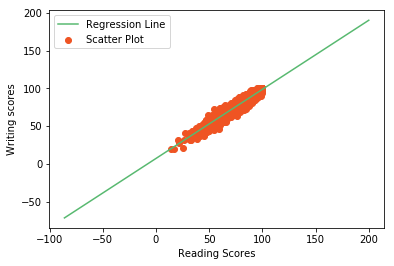

In [4]:
# Plotting Values and Regression Line using the aggrefgation functions in the packages 
# seems to be some sort of method call to the function

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)

# This uses the previos calculated beta coeff and implements a
# Singular regression model for this instance of data 
y = b0 + b1 * x

# Ploting Line using the plotting packages
# plus the green and orange color codes
# 
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
# Creat the labels for the plot to identify the independent and dependent vars
plt.xlabel('Reading Scores')
plt.ylabel('Writing scores')
plt.legend()
plt.show()

In [5]:
# We need to check the accuracy or test how good the model is
# by Calculating Root Mean Squares Error it will allow us to see
# how the predicted vlaues of the regression model compare to the actual data in the set of scores
# Once it is compete then it will be dispalyed to the console
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

4.473946880840203


In [6]:
# In order to test the model we can use the R^2 measure to see if the value falls between 0 or 1
# the closer this value is to 1 the better the model is and the closer it is to 0 then the worse the model
# is at preicting the output of Y 
# Additionally if the value come back negative then the model that is estimated using the least squares method is wrong
# Initially we have the total sum of squares and the total sum of squarres of residuals as zero 
# then after m iterations these values are stored in the variables declared and then printed to the console
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9067337801503714
